# DECISION TREES


In [1]:
# Decision Tree classifier on Iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
# Only on basis of petal length and width
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
# Decision tree with maximum depth specified
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [2]:
from sklearn.tree import export_graphviz
# Visualizing the trained decision tree
# Saving it as a dot file
export_graphviz(tree_clf,
                out_file="images/iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

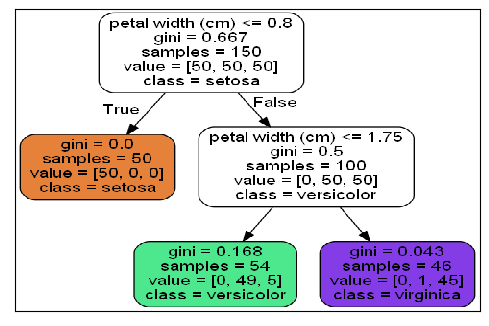

In [3]:
# Converting dot file to png
!dot -Tpng images/iris_tree.dot -o images/iris_tree.png
# Visualizing the png
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib as mpl
# Changing the defauly dpi so the image is more clear
mpl.rcParams['figure.dpi']= 100
image=img.imread('images/iris_tree.png')
plt.imshow(image, aspect='auto')
# Changing back to default dpi
mpl.rcParams['figure.dpi']= 80
plt.xticks(ticks=())
plt.yticks(ticks=())
plt.show()

- One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.
- <u>Node's samples attribute</u> -  counts how many training instances it applies to.
- <u>Node's value attribute</u> - how many training instances of each class this node applies to.
- <u>Node's gini attribute</u> - measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.<br/>

<b>Gini impurity</b><br/>
$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$
- $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node

Example(depth-2, left node) - $gini = 1 – (0/54)^2 – (49/54)^2 – (5/54)^2 ≈ 0.168$<br/>

- Scikit-Learn uses the <b>CART</b> algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers). 
- Algorithms such as <b>ID3</b> can produce Decision Trees with nodes that have more than two children.

#### Model Interpretation: White Box Versus Black Box
<u>White Box</u> - Fairly intuitive and their decisions are easy to interpret. Have nice and simple classification rules. eg - Decision Tree. <br/>
<u>Black Box</u> - They make great predictions, and we can easily check the calculations that they performed to make these predictions. But, it is usually hard to explain in simple terms why the predictions were made. ex - Random Forest and Neural Nets.

### Class Probabilities
- first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.

In [4]:
print(tree_clf.predict_proba([[5, 1.5]]))
# 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54)
pred = tree_clf.predict([[5, 1.5]])
iris['target_names'][pred[0]]

[[0.         0.90740741 0.09259259]]


'versicolor'

### The CART Training Algorithm
- Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees).
- Algorithm first splits the training set in two subsets using a single feature k and a thresold $t_k$ (e.g., "petal length ≤ 2.45 cm").
- <u>How does it choose k and $t_k$?</u>
    - It searches for the pair (k, tk) that produces the purest subsets (weighted by their size).
    -  The cost function that the algorithm tries to minimize - <br/>
    $
    \begin{split}
    &J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
    &\text{where }\begin{cases}
    G_\text{left/right} \text{ measures the impurity of the left/right subset,}\\
    m_\text{left/right} \text{ is the number of instances in the left/right subset.}
    \end{cases}
    \end{split}
    $
- Once it has successfully split the training set in two, it splits the subsets using the same logic.
- <u>Condition for stopping</u> - <br/>
max_depth, cannot find a split that will reduce impurity, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes.<br/>

The CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

<b>Note</b> -  Finding the optimal tree is known to be an NP-Complete problem. It requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why we must settle for a “reasonably good” solution.

### Computational Complexity
<u>Training</u>
- Algorithm compares all features on all samples at each node.
- This results in a training complexity of <b>O(n × m log(m))</b>.
-  Scikit-Learn can speed up training by presorting the data (set presort=True), but this slows down training considerably for larger training sets.

<u>Prediction</u>
- Making predictions requires traversing the Decision Tree from the root to a leaf, i.e.,  going through roughly O(log2(m)) nodes.
- Since each node only requires checking the value of one feature, the overall prediction complexity is just <b>O(log2(m))</b>, independent of the number of features. 

n = number of features <br>
m = number of instances

---------------------------------------------------------------------------------------------------------------------------

<b>Entropy</b><br>
$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$<br>
- It measures the average information content of a message. Entropy is zero when all messages are identical.
- A set’s entropy is zero when it contains instances of only one class.
- example depth 2 left node : <i>Entropy = $ -\frac{49}{54}\log_2(\frac{49}{54}) - \frac{5}{54}\log_2(\frac{5}{54}) ≈ 0.31$</i>
- Reduction in entropy after a split is known as <b>Information Gain</b>.

#### Which one to use - Gini or Entropy?
- We can select the entropy impurity measure by setting the criterion hyperparameter to "entropy"
- Gini impurity is slightly faster to compute, so it is a good default.
- When they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

### Regularization Hyperparameter
<u>Parmetric model</u>
- It has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).
- eg. Linear Regression<br>

<u>Nonparametric model</u>
- The number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.
- If not constrained it will most likely overfit the training data.
- eg. Decision Tree

<b>max_depth</b> - Maximum depth of tree.<br>
<b>min_samples_split</b> - The minimum number of samples a node must have before it can be split.<br>
<b>min_samples_leaf</b> - The minimum number of samples a leaf node must have.<br>
<b>min_weight_fraction_leaf</b> - Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances.<br>
<b>max_leaf_nodes</b> - Maximum number of leaf nodes.<br>
<b>max_features</b> - Maximum number of features that are evaluated for splitting at each node.<br>

<b><u>Note</u></b> -  <b>Increasing min_*</b> hyperparameters or <b>reducing max_*</b> hyperparameters will regularize the
model.


<u><b>Pruning</b></u>
- Deleting unnecessary nodes.
- A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not <b>statistically significant</b>.
- Standard statistical tests, such as the $χ^2$ test, are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis).
- If this probability, called the p-value, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. 

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib.colors import ListedColormap
X, y = make_moons(n_samples = 100, noise = 0.1)
names = ["Decision Tree - No Restriction", "Decision Tree - Restriction"]
# List with CART with and without restriction
treeclassifiers = [
    DecisionTreeClassifier(), 
    DecisionTreeClassifier(min_samples_leaf = 4, max_depth = 3)]

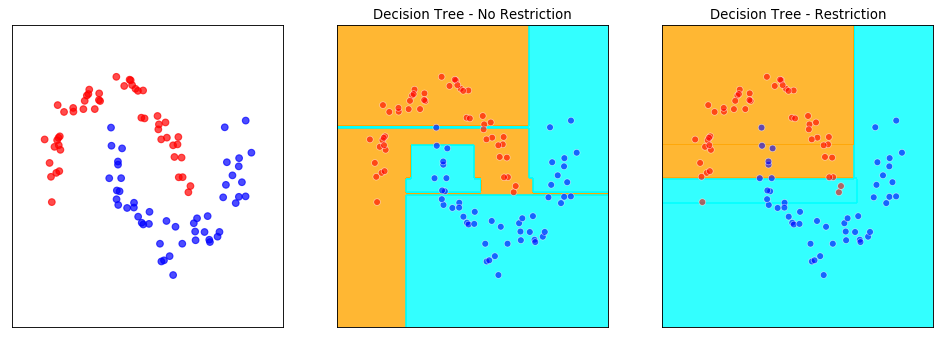

In [6]:
figure = plt.figure(figsize=(12, 5))
h = 0.02
i  = 1

# Necessary for creating colour composition for each and every point in space
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Define color for class boundary area and datapoints
cm_classes = ListedColormap(['#FFA500', '#00FFFF'])
cm_points = ListedColormap(['#FF0000', '#0000FF'])

# just plot the dataset first
ax = plt.subplot(1, len(treeclassifiers) + 1, i)
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_points, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name, clf in zip(names, treeclassifiers):
    ax = plt.subplot(1, len(treeclassifiers) + 1, i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm_classes, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_points, alpha=0.6, linewidths=0.6, edgecolors="white")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
    
figure.subplots_adjust(left=.02, right=.98)
plt.show()

The above plots shows a CART decision boundary with and without constraints. We can see that no restrictions increases chance of overfitting.

### Regression

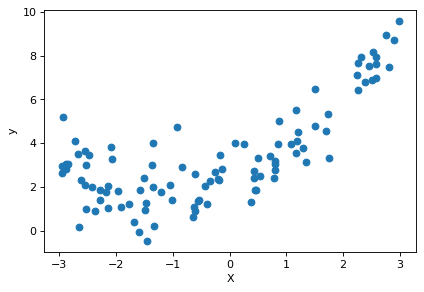

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
# Implementation a regression tree using DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2
from sklearn.tree import DecisionTreeRegressor
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

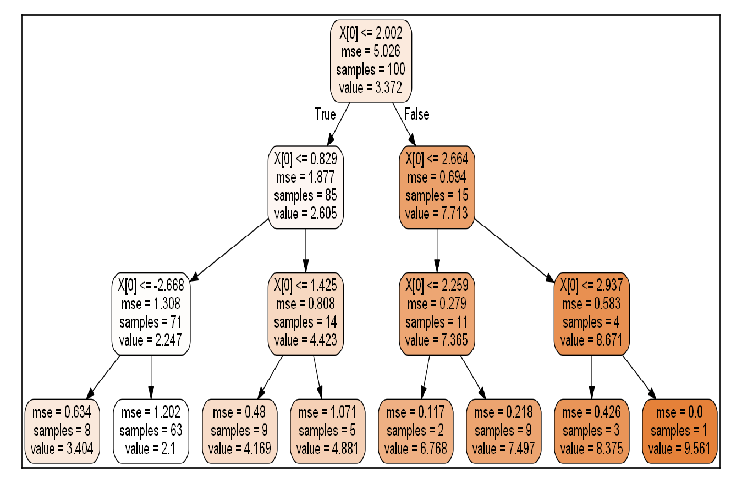

In [8]:
export_graphviz(tree_reg,
                out_file="images/regression_tree.dot",
                rounded=True,
                filled=True)
!dot -Tpng images/regression_tree.dot -o images/regression_tree.png
mpl.rcParams['figure.dpi']= 150
image=img.imread('images/regression_tree.png')
plt.imshow(image, aspect='auto', interpolation='nearest')
mpl.rcParams['figure.dpi']= 80
plt.xticks(ticks=())
plt.yticks(ticks=())
plt.show()

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that <b>minimizes the MSE</b>.<br>

<b>Cart Loss Function</b><br>
$
J(k, t_k) = \dfrac{m_{\text{left}}}{m}\text{MSE}_\text{left} + \dfrac{m_{\text{right}}}{m}\text{MSE}_{\text{right}} \quad
\text{where }
\begin{cases}
\text{MSE}_{\text{node}} = \sum\limits_{\scriptstyle i \in \text{node}}(\hat{y}_{\text{node}} - y^{(i)})^2\\
\hat{y}_\text{node} = \dfrac{1}{m_{\text{node}}}\sum\limits_{\scriptstyle i \in \text{node}}y^{(i)}
\end{cases}
$<br><br>
<b><u>Note</u></b> - Just like for classification tasks, Decision Trees are prone to overfitting when dealing with regression tasks, without any regularization.


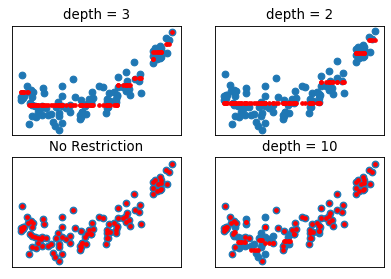

In [9]:
names = ["depth = 3", "depth = 2", "No Restriction", "depth = 10"]
treeregressors = [
    DecisionTreeRegressor(max_depth = 3),
    DecisionTreeRegressor(max_depth = 2),
    DecisionTreeRegressor(), 
    DecisionTreeRegressor(max_depth = 10)]
i = 1

# Visualization of prediction
for name, reg in zip(names, treeregressors):
    ax = plt.subplot(2, 2, i)
    reg.fit(X, y)
    y_pred = reg.predict(X)
    ax.scatter(X, y)
    ax.scatter(X, y_pred, c = 'red', s=10)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Limitations of Decision Trees
- Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to <b>training set rotation</b>. 
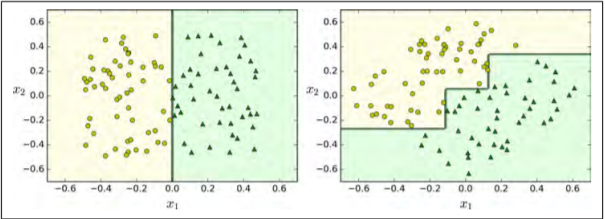
When the left dataset is rotated by 45 degrees (right image) decision boundary is less likely to generalize.
    - One way to limit this problem is to use <b>PCA</b>, which often results in a better orientation of the training data.
<br><br>
- Decision Trees are very sensitive to small <b>variations in the training data</b>. Since the training algorithm used by Scikit-Learn is stochastic we may get very different models even on the same training data (unless we set the random_state hyperparameter).
    - <b>Random Forests</b> can limit this instability by averaging predictions over many trees.